# --------------------------------------------------------------------------------------------

# NeuroFlow Data Scientist - Assesment

Submitted By 

1. Name - Arvind Ramkumar 
1. Phone - 4808592393
1. Email - arvindramkumar1996@gmail.com
1. Website - https://arvindramkumar.com

# --------------------------------------------------------------------------------------------

## Data PreProcessing  

In [65]:
import pandas as pd 
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [66]:
df = pd.read_csv('phq_all_final (1).csv')

In [67]:
df.head()

,date,patient_id,type,patient_date_created,score
0,2019-08-26T13:32:43.019162,8430,gad7,2019-06-03T13:23:02.63568,6
1,2019-11-15T17:55:11.364877,8430,gad7,2019-06-03T13:23:02.63568,1
2,2019-10-07T18:23:29.611351,14338,gad7,2019-06-03T13:32:30.66846,10
3,2019-11-04T20:16:28.610965,14338,gad7,2019-06-03T13:32:30.66846,7
4,2019-12-02T20:56:55.966354,14338,gad7,2019-06-03T13:32:30.66846,9


In [68]:
df.shape

(53698, 5)

In [69]:
# Number of Not Null Values

notnull_columns = df.columns[df.notnull().any()]
df[notnull_columns].notnull().sum()

date                    53698
patient_id              53698
type                    53698
patient_date_created    53698
score                   53698
dtype: int64

In [70]:
print('Number of Unique Patient ID is' , df['patient_id'].nunique())

Number of Unique Patient ID is 15502


In [71]:
df.dtypes

date                    object
patient_id               int64
type                    object
patient_date_created    object
score                    int64
dtype: object

In [72]:
df['date'] =  pd.to_datetime(df['date'])
df['patient_date_created'] =  pd.to_datetime(df['patient_date_created'])

df['c_month'] = df['patient_date_created'].dt.month # Month
df['c_year'] = df['patient_date_created'].dt.year # Year

df['e_month'] = df['date'].dt.month # Month
df['e_year'] = df['date'].dt.year # Year

In [73]:
df.head()

,date,patient_id,type,patient_date_created,score,c_month,c_year,e_month,e_year
0,2019-08-26 13:32:43.019162,8430,gad7,2019-06-03 13:23:02.635680,6,6,2019,8,2019
1,2019-11-15 17:55:11.364877,8430,gad7,2019-06-03 13:23:02.635680,1,6,2019,11,2019
2,2019-10-07 18:23:29.611351,14338,gad7,2019-06-03 13:32:30.668460,10,6,2019,10,2019
3,2019-11-04 20:16:28.610965,14338,gad7,2019-06-03 13:32:30.668460,7,6,2019,11,2019
4,2019-12-02 20:56:55.966354,14338,gad7,2019-06-03 13:32:30.668460,9,6,2019,12,2019


### Initial Findings 
1.	There were 53,698 Exams in total, so 53,698 rows in total 
2.	There are no missing values 
3.	There are 15,502 Unique Patient ID. 
4.	The dates were in the object dtype and is converted to Time Format. 
5.	The dates had time in them up to ms. 
6.	There is only one type of exam data is available (gad7) and thus, making the type column redundant. 



# --------------------------------------------------------------------------------------------

# Assumptions  

7.	The months between 2020 March and 2020 July is affected by COVID. So, the values including the patients admitted and the exams taken might be affected by this reason. But since we do not have enough data, for the entire analysis, COVID is assumed to have not happened. (Except for a few scenarios and it will be mentioned wherever required). 
1.	Each unique ID corresponds to a patient. No two patients will have the same ID, or the same person would not have more than one ID.
2.	The exams were taken by the patients either coming to the center or from the home, but the exams are not hand filled. This is because the exercise date has a time stamp, that’s accurate to milliseconds. This is not possible unless the exam is taken on an electronic medium. 
3.	The patients did not undergo any emotional calming therapy or activity before taking the test and doing this will not exactly capture their anxiety level. So, here it is assumed that the patient took the test whenever he felt like, and no deliberate actions were taken prior to the test 
4.	It is quite unsure whether the patient came in to take the test on their own will or where the forced. If the patient takes the test with no interest, the result might not exactly reflect to what their anxiety level is. Here, for assumption, let’s assume that the patients came under their own will, so the anxiety level is captured properly. 
5.	This is basically a big experiment that will exactly portray the patient’s anxiety level, so let’s assume that there is a randomization is involved and will help in our statistical evaluation. 
6.	Although, it is mentioned that the cadence at which the tests are given typically monthly once or twice but might vary. Here we assume that there are no follow ups on a specific routine as such and there might just be a minimum number of times that they had to take the test, but they could also take the test more than the minimum number of times. 


# --------------------------------------------------------------------------------------------

## 1. Patients Registration Over the Period of Time

In [76]:
df_patient = df.drop_duplicates(subset = ["patient_id"])

patient_id
c_year c_month            
2019   6               354
       7               349
       8              1282
       9               840
       10              999
       11             1129
       12             1321
2020   1              1298
       2              2149
       3              1829
       4              1524
       5               738
       6               987
       7               703

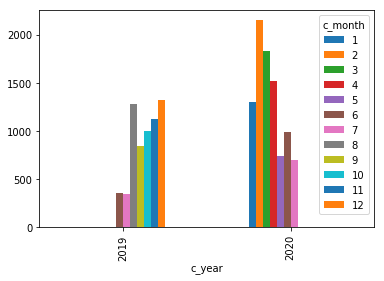

In [117]:
pd.crosstab(df_patient['c_year'],df_patient['c_month']).plot.bar()
number_of_patients = df_patient.groupby(['c_year', 'c_month']).count()[['patient_id']]
number_of_patients

#### Findings 

1.	We have the data spread from 2019 June to 2020 July. 
2.	With the given data, we can see that there is an average overall rise in the number of patients until 2020 February. 
3.	After 2020 February, the Patients registering has begun to decline. 
4.	We might need to find the reason why there is a decline in the admittance of patient after February 2020. Although there is a possibility that the saturation point has been reached, it’s impossible to say for sure. Because we do not know about since when did the company has been taking in patients. 
5.	Also, the decline period, is a period of COVID. So it is an high possibility that people avoided their mental health checkup due to lockdowns and safety reasons. 
6.	Since the company began in 2016, I am assuming that we had patients since then and we might need to assess the patient’s registration since beginning to understand the extent of the problem. 
7.	If we have more data, it’s possible to preform YOY analysis or MOM Analysis. 
8.	If this problem isn’t addressed, then the company might be in serious problem. 
9.	The c_year and c_month represent the Year and Month in which the patient registered with the Neuroflow. 


## 2. Number of Exams taken over the period of time 

patient_id
e_year e_month            
2019   6               177
       7               471
       8              1067
       9              1950
       10             2744
       11             3234
       12             3814
2020   1              4953
       2              5304
       3              6158
       4              7072
       5              5797
       6              5420
       7              5537

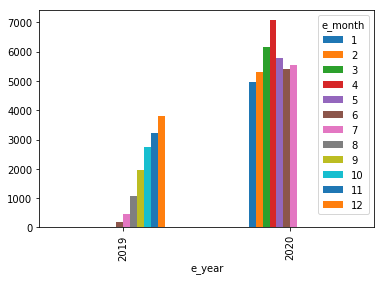

In [110]:
pd.crosstab(df['e_year'],df['e_month']).plot.bar()
number_of_exams = df.groupby(['e_year', 'e_month']).count()[['patient_id']]
number_of_exams

#### Findings

1.	The findings of this table and graph is coherent with the findings that we had from “Patients registered over the period of time”. 
2.	Since there was a decline in number of patients registering to Neuroflow, there is an impact on the number of exams taken as well. 
3.	There is a linear increase in the number of exams taken until 2020 April and has a decreasing trend after that. 
4.	It is a possibility to say that the Number of patients affecting the number of exams taken is affecting by a lag of 2 months. But to know for sure, we would need the previous all available rhetorical data. 
5.	If we can establish the lag and relationship between those two, it is possible for us to identify the expectation of the rise or fall of the number of exams, based on the number of new patients we will have. 
	 	 
6.	E_year and e_month represent the Year and Month when the exam was taken respectively. 


## 3. Exam Scores Variation 

min  max    sum  count      mean
e_year e_month                                  
2019   6          0   21   1499    177  8.468927
       7          0   21   3040    471  6.454352
       8          0   21   7386   1067  6.922212
       9          0   21  12040   1950  6.174359
       10         0   21  14269   2744  5.200073
       11         0   21  15895   3234  4.914966
       12         0   21  17970   3814  4.711589
2020   1          0   21  22831   4953  4.609530
       2          0   21  24960   5304  4.705882
       3          0   21  28619   6158  4.647450
       4          0   21  31886   7072  4.508767
       5          0   21  24553   5797  4.235467
       6          0   21  24440   5420  4.509225
       7          0   21  27535   5537  4.972910

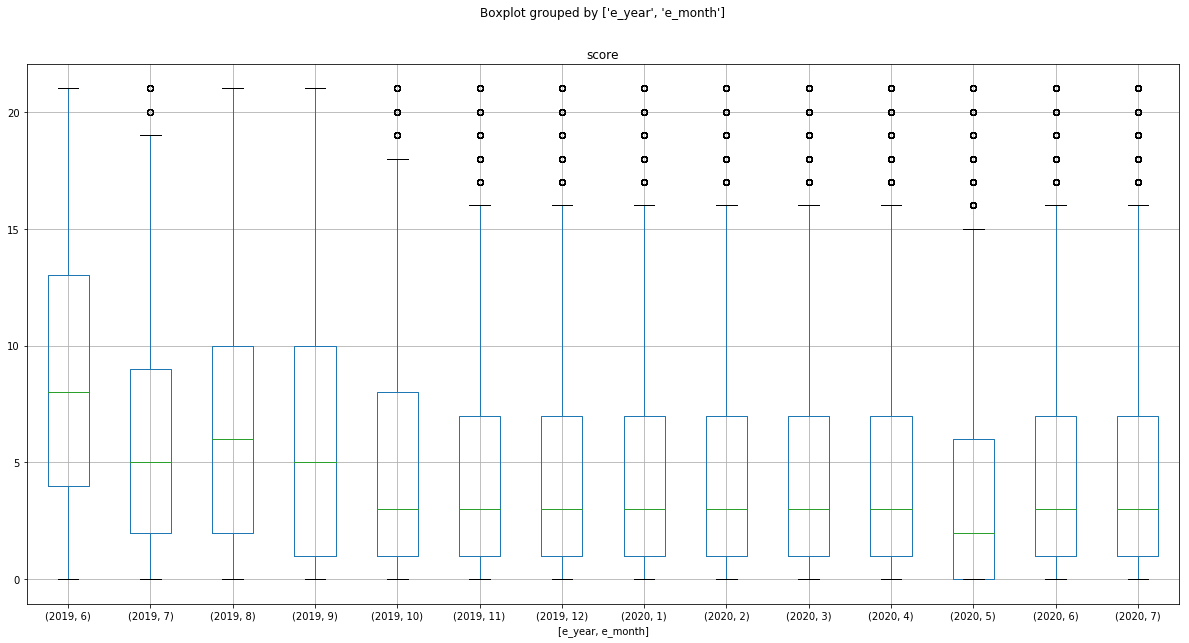

In [124]:
boxplot = df.boxplot(column=['score'], by = ['e_year', 'e_month'], figsize=(20,10))
avg_score = df.groupby(['e_year', 'e_month']).score.agg(["min", 
                                               "max", 
                                               "sum", 
                                               "count", 
                                               "mean"]) 
avg_score

#### FIndings 

1.	It’s already established that we have seen a decline in the number of exams taken after April 2020. 
2.	Here, we are looking at how the average score is varying since the June 2019. 
3.	We can see that the average score of the exams are declining in a consistent pace, and it doesn’t seem to have any correlation with the number of exams taken. 
4.	We need to understand why there is a decrease in the average score, and if we are able to identify this, we can make some effort in reducing the Anxiety level in patients. 
5.	A possible explanation would be, due to COVID, people staying at home, spending more time with family and pets is helping their anxiety level and this is a wild hypothesis, and can be put to test if we have more rhetorical data and analyze the change since beginning. 	 
6.	E_year and e_month represent the Year and Month when the exam was taken respectively. 
7.	But, on further examination of the box plot, we see that the outliers seem to have risen towards the end. So, may be, on the other end of the spectrum, COVID Lockdown has affected the mental health of a very select people very badly. 
8.	We can look in depth of these outlier patients to understand what went wrong. This will help us to evaluate the effect of COVID lockdown, if that’s a significant contributing factor. 


## 4. Effect of the time when the examination was taken on the score

In [80]:
df['e_hour'] = df['date'].dt.hour # hour
df['e_hour_time'] = np.nan
df.e_hour_time = df.e_hour_time.mask((((df.e_hour >=18)&(df.e_hour <=24)) | ((df.e_hour >=1)&(df.e_hour <=6))),'Night')
df.e_hour_time = df.e_hour_time.mask((((df.e_hour >=7)&(df.e_hour <=17))),'Morning')

In [112]:
avg_score_time = df.groupby(['e_hour_time']).score.agg(["min", 
                                               "max", 
                                               "sum", 
                                               "count", 
                                               "mean"]) 
avg_score_time

,min,max,sum,count,mean
e_hour_time,,,,,
Morning,0,21,140187,30946,4.530052
Night,0,21,110381,21686,5.089966


In [128]:
from scipy.stats import ttest_ind

df1 = df

morning = df1[(df1['e_hour_time'] != 'Night')]
night = df1[(df1['e_hour_time'] == 'Night')]

# t test for comparing whether or not Averarge Amount Earned with Promotion > Amount without Promotion

results = ttest_ind(morning.score, night.score, equal_var=False)
print(results)
alpha = 0.05
if ((results[0] < 0) & (results[1]/2 < alpha)):
    print ("Reject Null Hypothesis, mean of {} is greater than mean of {}".format('night','morning'))
else:
    print ("Accept Null Hypothesis")
    

Ttest_indResult(statistic=-11.043003237049533, pvalue=2.5745267668642746e-28)
Reject Null Hypothesis, mean of night is greater than mean of morning


#### Findings 

1.	Amongst the data that is provided for analysis, date is one of the most important factors to work with. 
2.	The information to be extracted from the date parameter is huge. 
3.	We have already established that the exam is taken in an electronic medium and we are trying to determine whether the time in which the patient take an exam is a factor that will affect the score. 
4.	Anxiety level varies between a day for a person, right from the time he wakes up to the time he goes to sleep. 
5.	Here for analysis, we have set up the Mornings to be time between 6 AM – 6 PM and the nights to be between 6 PM – 6 AM. 
6.	Basic understanding is as below.	 
7.	On preliminary analysis, we see that the Average score for the exam taken during morning is less than the average score for the exam taken during the night. 
8.	But we need to have a proof statistically and so we do a hypothesis testing on the mean. 
            a.	Average Score in Morning – µ_1 | Average Score in the Night – µ_2
            b.	Null Hypothesis – H0 : µ_1= µ_2 | Alternate Hypothesis – H1 : µ_1 < µ_2
            c.	Here, as far as this problem is concerned, it is preferable to do Welch’s T test, because there is high possibility that the Variance of these samples might not be equal.
            d.	So, for the Rejection Criteria for the Null Hypothesis, the test statistic < -t (α,V). Since the Degree of Freedom is Really high, we choose the comparing statistic to be 1.96 (From t table).
            e.	Also, If p-value is less than 0.5, it also rejects the null hypothesis.
9.	Here, p-value is 2.57 e-28, it is much much smaller that 0.5 and the test statistic is -11.3, we reject the null hypothesis and accept the alternate hypothesis that the Average score in night is higher than the average score in morning. 
10.	So, if we can prove this on a much larger sample, we can make sure that we have the patients take the exam probably two times a day, one during morning and one during night and the result can be aggregated to get a more reliable result. 


## 5.	Effect of the day when the examination was taken on the score

In [83]:
df['e_day'] = df['date'].dt.day_name()
df['e_weekend'] = np.nan
df.e_weekend = df.e_weekend.mask( ((df.e_day == "Friday") | (df.e_day == "Saturday") | (df.e_day == "Thursday")),  'Weekend')
df.e_weekend = df.e_weekend.mask( ((df.e_day == "Monday") | (df.e_day == "Tuesday") | (df.e_day == "Wednesday") | (df.e_day == "Sunday")), 'Weekday')


In [113]:
avg_score_weekend = df.groupby(['e_weekend']).score.agg(["min", 
                                               "max", 
                                               "sum", 
                                               "count", 
                                               "mean"]) 
avg_score_weekend

,min,max,sum,count,mean
e_weekend,,,,,
Weekday,0,21,162558,33727,4.819818
Weekend,0,21,94365,19971,4.725101


In [130]:
from scipy.stats import ttest_ind

df1 = df

weekday = df1[(df1['e_weekend'] != 'Weekend')]
weekend = df1[(df1['e_weekend'] == 'Weekend')]

# t test for comparing whether or not Averarge Amount Earned with Promotion > Amount without Promotion

results = ttest_ind(weekday.score, weekend.score, equal_var=False)

alpha = 0.05
if ((results[0] < 0) & (results[1]/2 < alpha)):
    print ("Reject Null Hypothesis, mean of {} is greater than mean of {}".format('weekend','weekday'))
else:
    print ("Accept Null Hypothesis")

Accept Null Hypothesis


#### Findings

1.	Similar to the Effect of Time of exam on the score, we perform a test to see whether the day of the exam has an effect. 
2.	For example, a person might have less anxiety towards the weekend and vice versa. So, we analyze this and see if we have any statistical proof. 
3.	We follow, the very same procedure as mentioned in “Effect of time of exam score” and the initial analysis shows that there might not be much difference when it comes to days
4.	Weekdays are Sunday, Monday, Tuesday and Wednesday
5.	Weekdays are Thursday, Friday and Saturday 
6.	The classification is done based on a simple understanding that people embrace a Friday looking for a weekend, but on Sunday getting, an idea of getting back to reality might affect their anxiety level. 	 
7.	As expected the statistical test, doesn’t not give evidence that means of average score on weekday is different from average score on weekends. 	 
8.	Similar to this, we could work on different parameters of date to see whether there is an impact that we would like to work on. For example, exam before a day of holiday, exam on any specific day of the week, beginning of year, beginning of week, score change relative to these specific days against the total average. 
9.	We need to maximize the details that we can extract from dates, so all these tests are recommended


## 6.	Number of exams taken by the patient and the average score in the group

In [86]:
d = {'date':'Count of Tests', 'score':'Average of Scores'}
patient=df.groupby('patient_id').agg({'date':'count', 'score':'mean'}).rename(columns=d)
patient = patient.reset_index()
patient = patient.groupby('Count of Tests').agg({'patient_id':'count', 'Average of Scores':'mean'}).rename(columns=d)
patient

,patient_id,Average of Scores
Count of Tests,,
1,4597,6.071568
2,2422,5.326796
3,2106,4.531339
4,1947,4.430663
5,1536,4.342839
6,1079,4.353568
7,895,4.779888
8,380,4.582566
9,138,5.018519


#### Findings 

1. There doesn’t seem to be any significant findings from the above table, about the relationship between the number of exams that a patient takes and the average score in their group.
2.	Also, there are a few patients with an incredibly high number of exams, so we might want to investigate those specific patients to analyze the need for taking so many exams and providing them with special care. 


## 7. Variation of the Severity Level 

In [87]:
df['severity'] = np.nan
df.severity = df.severity.mask((((df.score >=0)&(df.score <=5))),'Low to Minimal')
df.severity = df.severity.mask((((df.score >=6)&(df.score <=10))),'Mild')
df.severity = df.severity.mask((((df.score >=11)&(df.score <=15))),'Moderate')
df.severity = df.severity.mask((((df.score >=16)&(df.score <=21))),'Severe')

,patient_id
severity,
Low to Minimal,35402
Mild,10275
Moderate,4651
Severe,3370


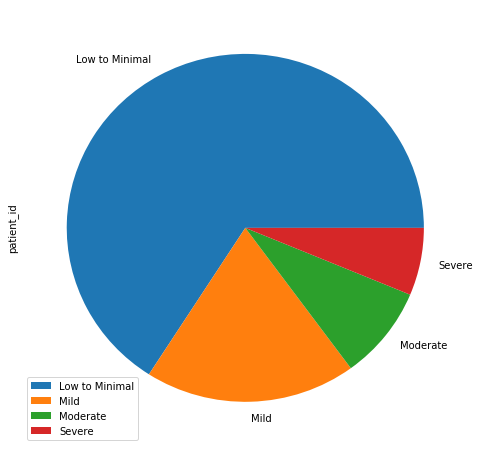

In [114]:
severitylevel = df.groupby(['severity']).count()[['patient_id']]
severitylevel.plot.pie(subplots=True,figsize=(8, 8))
severitylevel

#### Findings

1.	As given, there are four different severity levels, and it is only reasonable to analyze the split of patients based on their average score level. 
1.	It is obvious that most patients will have low to minimal severity but understanding this will give us a better a perspective about where the patients lie. 
3.	A table and a pie chart are provided for analysis 


## 8. The Average and the Spread of the data

/Users/arvindramkumar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/arvindramkumar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


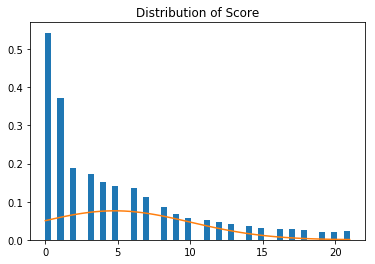

The mean of the scores is  4.784591604901486
The standard deviation or the spread of the score is  5.246920585650435


In [89]:
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab

n, bins, patches = plt.hist(df.score, 50, normed=1)
mu = np.mean(df.score)
sigma = np.std(df.score)
plt.plot(bins, mlab.normpdf(bins, mu, sigma))
plt.title('Distribution of Score')
plt.show()
print('The mean of the scores is ', mu)
print('The standard deviation or the spread of the score is ',sigma)

#### Findings 

1.	This is an extension of exam score variation. 
2.	Here we would like to see how the data is spread to have a better understanding of the patients. 
3.	A frequency distribution chart is provided, and the results are obvious that most patients have a low score and the data is skewed left. 


## 9.	Number of patients that took the exam on the day registration

In [97]:
df['samedayexam'] = np.nan
df.samedayexam = df.samedayexam.mask(((df['date'].dt.date == df['patient_date_created'].dt.date)),1)
df.samedayexam = df.samedayexam.mask(((df['date'].dt.date != df['patient_date_created'].dt.date)),0)

,patient_id
samedayexam,
0.0,50639
1.0,3059


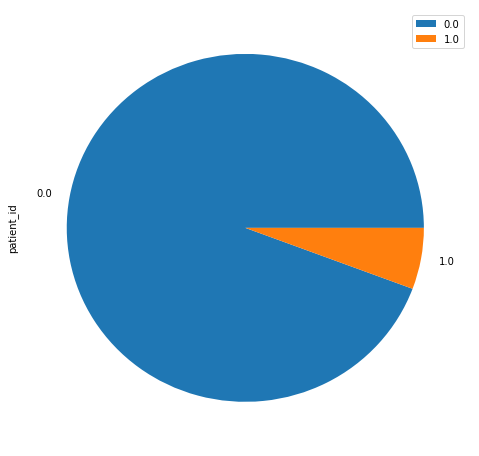

In [115]:
samedayexam = df.groupby('patient_id').sum()[['samedayexam']]
samedayexam = samedayexam.reset_index()
samedayexam = df.groupby('samedayexam').count()[['patient_id']]
samedayexam.plot.pie(subplots=True,figsize=(8, 8))
samedayexam

#### Findings 

1.	We would like to know whether the patients took the exam on the same day they were registered.  
2.	The results are surprising and only 5% of patients take exam on the same day. 
3.	We can see that the patients avoid taking the exam on the same day. It is highly recommended that more investigation is done on this to know the reason why patients aren’t taking the exam on the same day. 
4. Similar to the same day, same month analysis could also be done


## 10.	Effect of severity level and taking exam on the same day of registration 

patient_id
severity       samedayexam            
Low to Minimal 0.0               33435
               1.0                1967
Mild           0.0                9720
               1.0                 555
Moderate       0.0                4332
               1.0                 319
Severe         0.0                3152
               1.0                 218

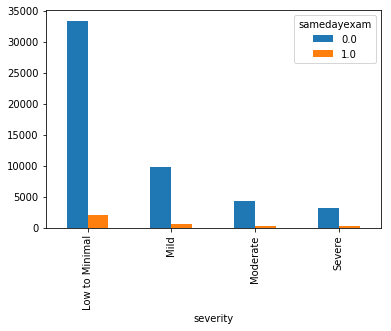

In [132]:
pd.crosstab(df['severity'],df['samedayexam']).plot.bar()
sameday_severity = df.groupby(['severity', 'samedayexam']).count()[['patient_id']]
sameday_severity

#### Findings 

1.	This is an extension of “Variation of Severity Level” and “Number of patients that took the exam on the same day of Registration”
2.	We would like to see how these things are when put together. 
	 
3.	It is advised to do a test for proportionality (Similar to the t-test), to see whether the patients taking the exam on the same day has anything to do with the severity level. 
4.	Number of patients who took the exam on the same day, to the number of patients who did not take the exam on the same day across different severity levels. If the proportions aren’t equal, then the severity level is a factor that is affecting the patients on taking the exam on the same day or not. 


# --------------------------------------------------------------------------------------------

# Other Data Required / Recommendations for further Data Collection


1. It’s better to know more about the patient’s detail, including and not limiting to age, Gender, family, demographic, location, area’s crime rate, neighborhood details etc. 
8.	The interest and involvement of the patient. The patient might have taken the test on their own will/ interest or being forced by someone else to take it. This might affect the test results and their reliability. 
9.	Rhetorical data since beginning of time to understand the YOY and the MOM change and to understand the effect of COVID lockdown in 2020. 
 

# --------------------------------------------------------------------------------------------

# Recommended further analysis 

1.	The major problem being the visualization of progress of the patient, we can plot a line chart for individual patients and together they will give us more information about the overall impact of the treatment on the patients. Along the horizontal axis, we would like to have the exam number and the vertical axis will have the exam score. All the scores for the patients are plotted and for each patient, a line connecting the dots for that patient will indicate the progress of the patient. Together, we can have an overall idea about the impact of the treatment on the patient. 
2.	We can also do an analysis of the first exam score and the most recent exam scores, and if the change in the severity could be studied. It is either, the severity decreased, severity increased, or the severity had stayed the same. Based on this change, it is possible to say whether the treatment has been a positive change for the patient. Together, when we see the same result for the entire population, we will have an understanding about the impact of the treatment on everyone. 
3.	Assuming the last exam date is the date, when the patient got better and moved out of the system, we will know the number days he had stayed within the system. So, A clustering algorithm, against the first test score and number of days the person was in the system, we will have an understanding about how many exams, days or how many treatments are required for a person to feel better based off the first exam score. 
4.	With the other personal details including the age and gender as mentioned in the (1) in the Other data required, we can develop a regression tree model to understand the factors affecting the exam score. If we are able to study that, that will be helpful for the doctor to treat the patient and we will have a better understanding about what causes the Anxiety in patients. 
5.	Other date depend analysis as mentioned above needs to be performed to understand all the impacts that the dates have on the score. 
6.	A rigid timeline/ schedule has to be set for taking the exam based on the severity level. This will help in minimizing the noise that affects the analysis and make the test more reliable. 
7.	In order to avoid the noise of the mindset at which the patient takes the exam, the exam needs to be taken at least twice in a single day at different time frame and an aggregate could be used as the score result, which makes the tests more reliable. 


# --------------------------------------------------------------------------------------------